<a href="https://colab.research.google.com/github/biswajitmohanty/genai/blob/main/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
import pandas as pd
import nltk
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

In [ ]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet') # lemmatization - running -> run

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Load BBC news dataset
df = pd.read_csv("/content/BBC News Train.csv")

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [ ]:
# Function to clean and preprocess text
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text, language='english', preserve_line=True)  # Tokenization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stopwords & lemmatize
    return tokens

# Apply preprocessing to the "Text" column
df["clean_text"] = df["Text"].apply(preprocess_text)

# Convert to list of lists for Word2Vec training
sentences = df["clean_text"].tolist()

In [ ]:
# Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4) # 100 EMEDDINGS

# Save model (optional)
model.save("word2vec_bbc.model")

Words similar to 'economy':
economic: 0.9988
deal: 0.9964
increase: 0.9959
higher: 0.9945
borrowing: 0.9938
revenue: 0.9915
however: 0.9909
spending: 0.9905
aviation: 0.9899
yukos: 0.9897


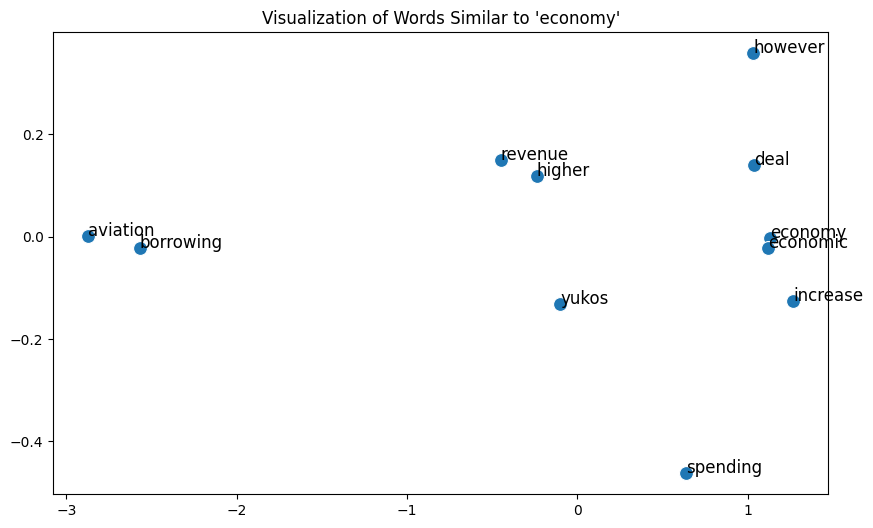

In [ ]:
# Find similar words to a given word
word = "economy"
if word in model.wv:
    similar_words = model.wv.most_similar(word, topn=10)
    print(f"Words similar to '{word}':")
    for sim_word, score in similar_words:
        print(f"{sim_word}: {score:.4f}")

# Visualization of similar words using PCA
def plot_similar_words(word, model):
    if word not in model.wv:
        print(f"'{word}' not found in vocabulary!")
        return

    similar_words = [word] + [w for w, _ in model.wv.most_similar(word, topn=10)]
    word_vectors = [model.wv[w] for w in similar_words]

    # Reduce dimensions using PCA
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(word_vectors)

    # Plot the words
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=reduced_vectors[:, 0], y=reduced_vectors[:, 1], s=100)

    for i, txt in enumerate(similar_words):
        plt.annotate(txt, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=12)

    plt.title(f"Visualization of Words Similar to '{word}'")
    plt.show()

# Example visualization
plot_similar_words("economy", model)

In [ ]:
print(model.wv.similarity("business", "economy"))
print(model.wv.similarity("business", "politics"))
print(model.wv.similarity("happy", "content"))

0.97116256
0.9501339
0.9471843
